> Name : Praful Gotmare

### Project Description :

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

### Curriculum For This Project :

1. The Business Problem Exploring 
2.The Dataset 
3.Exploratory Data Analysis (eda) - Outliers
4.Exploratory Data Analysis (eda) - Graphs
5.Converting Categorical To Numerical
6.Seperating Training And Test Data
7.Running The Models
8.Hyper Parameter Tuning XGB And GBR
9.Standard Scaling 06m Robust Scaling
10.Final Predictions On The Test Dataset
11.Saving The Final Model in PKL File

### Loading Packages and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset

df_train = pd.read_csv("Train.csv")
df_test = pd.read_csv("Test.csv")


In [3]:
df_train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [4]:
df_test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [5]:
df_train.shape

(8523, 12)

In [6]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
df_train["Item_Weight"].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

### EDA using Pandas Profiling

In [183]:
import pandas_profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(df_train)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [184]:
profile.to_file("Bigmart Analysis.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
df_train["Item_Weight"].fillna(df_train["Item_Weight"].mean(),inplace= True)
df_test["Item_Weight"].fillna(df_test["Item_Weight"].mean(),inplace= True)

In [11]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### Outlet size is categorical column so we have to fill it with mode imputation

In [13]:
# Mean - Average value
# Mode - Most repeated value

In [14]:
df_train["Outlet_Size"]

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [15]:
df_train["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [16]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = df_train.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [17]:
mode_of_Outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [18]:
missing_values = df_train["Outlet_Size"].isnull()

In [19]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [20]:
df_train.loc[missing_values, 'Outlet_Size'] = df_train.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [21]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [22]:
# For test 

In [23]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size_test = df_test.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [24]:
mode_of_Outlet_size_test

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [25]:
missing_values_test = df_test["Outlet_Size"].isnull()
missing_values_test

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool

In [26]:
df_test.loc[missing_values_test, 'Outlet_Size'] = df_test.loc[missing_values_test,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size_test[x])

In [27]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### Data Visualization 

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

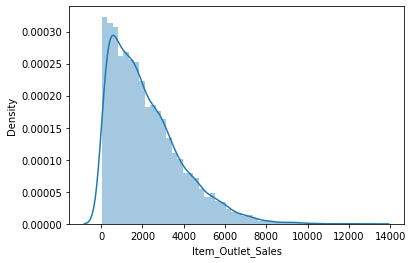

In [28]:
sns.distplot(df_train["Item_Outlet_Sales"])

<AxesSubplot:>

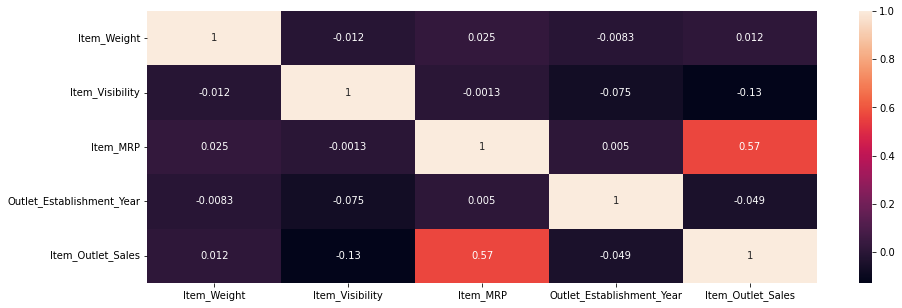

In [29]:
# correlation matrix

plt.figure(figsize=(15,5))
sns.heatmap(df_train.corr(), annot=True)

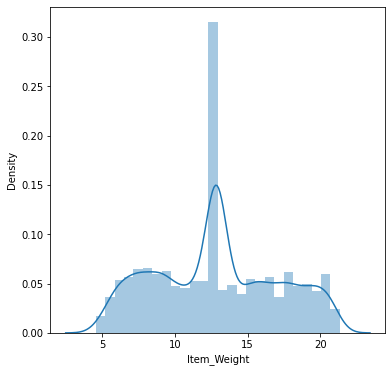

In [30]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(df_train['Item_Weight'])
plt.show()

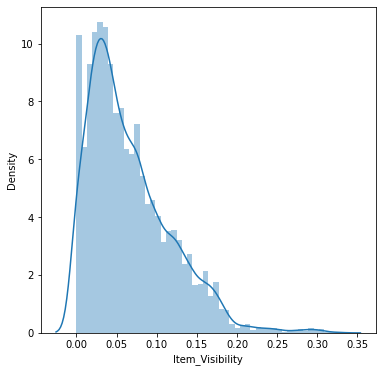

In [31]:
# Item Visibility distribution

plt.figure(figsize=(6,6))
sns.distplot(df_train['Item_Visibility'])
plt.show()

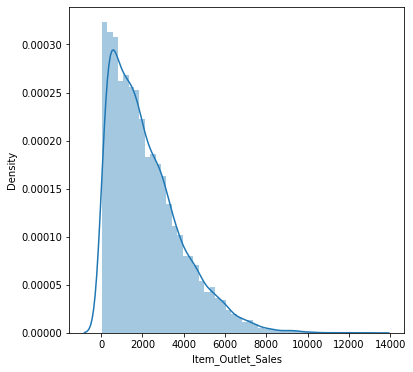

In [32]:
# Item_outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(df_train['Item_Outlet_Sales'])
plt.show()

In [33]:
# Univariate Plots lets look at the countplots for categorial data

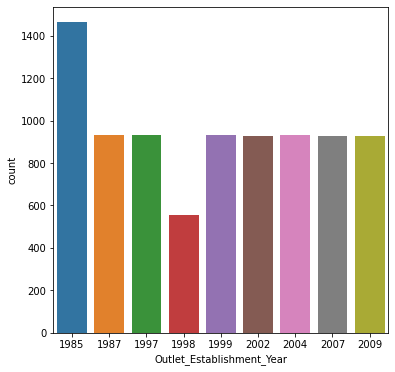

In [34]:
# Outlet_Establishment_Year column

plt.figure(figsize=(6,6))
sns.countplot(x= "Outlet_Establishment_Year" , data= df_train)
plt.show()

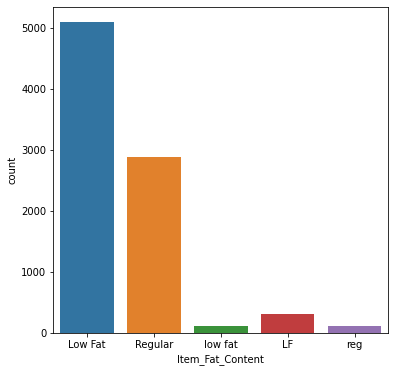

In [35]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=df_train)
plt.show()

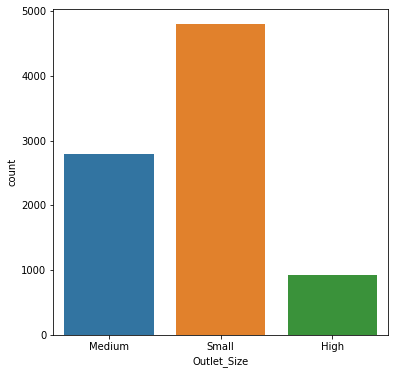

In [36]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=df_train)
plt.show()

In [37]:
# Feature Drop

In [38]:
df_train.drop(["Item_Identifier", "Outlet_Identifier"], axis=1 ,inplace=True)
df_test.drop(["Item_Identifier", "Outlet_Identifier"], axis=1 ,inplace=True)

In [39]:
df_train.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [40]:
df_test.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.75,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.30,reg,0.038428,Dairy,87.3198,2007,Small,Tier 2,Supermarket Type1


### Data Preprocessing / EDA

In [43]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [44]:
df_train.replace({"Item_Fat_Content" : {"low fat" :"Low Fat" , "LF" : "Low Fat" , "reg" : "Regular"}} , inplace=True)

In [45]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [46]:
df_train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [47]:
df_train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [48]:
df_train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

#### Label Encoding

Categorical Features Are :
    
    Item_Identifier
    Item_Fat_Content
    Item_Type
    Outlet_Size
    Outlet_Location_Type
    Outlet_Type
    Outlet_Identifier

In [49]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()

In [50]:
# df_train["Item_Identifier"] = encoder.fit_transform(df_train["Item_Identifier"])
# df_train["Outlet_Identifier"] = encoder.fit_transform(df_train["Outlet_Identifier"])

df_train["Item_Fat_Content"] = encoder.fit_transform(df_train["Item_Fat_Content"])
df_train["Item_Type"] = encoder.fit_transform(df_train["Item_Type"])
df_train["Outlet_Size"] = encoder.fit_transform(df_train["Outlet_Size"])
df_train["Outlet_Location_Type"] = encoder.fit_transform(df_train["Outlet_Location_Type"])
df_train["Outlet_Type"] = encoder.fit_transform(df_train["Outlet_Type"])



In [51]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int32  
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   int32  
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   int32  
 7   Outlet_Location_Type       8523 non-null   int32  
 8   Outlet_Type                8523 non-null   int32  
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(5), int64(1)
memory usage: 499.5 KB


In [52]:
df_train.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228


In [53]:
# Detect Outliers

In [54]:
df_train.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.066132,7.226681,140.992782,1997.831867,1.453596,1.112871,1.201220,2181.288914
std,4.226124,0.477836,0.051598,4.209990,62.275067,8.371760,0.683084,0.812757,0.796459,1706.499616
min,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,9.310000,0.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,12.857645,0.000000,0.053931,6.000000,143.012800,1999.000000,2.000000,1.000000,1.000000,1794.331000
75%,16.000000,1.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,21.350000,1.000000,0.328391,15.000000,266.888400,2009.000000,2.000000,2.000000,3.000000,13086.964800


<AxesSubplot:xlabel='Item_Weight'>

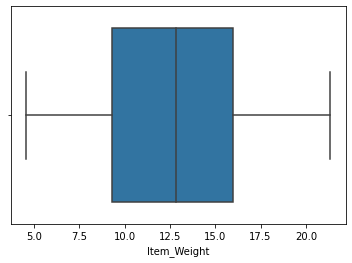

In [55]:
sns.boxplot(df_train['Item_Weight'])

<AxesSubplot:xlabel='Item_Outlet_Sales'>

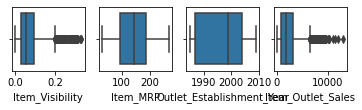

In [56]:
plt.figsize = (3,6)

plt.subplot(3,4,1)
sns.boxplot(df_train['Item_Visibility'])

plt.subplot(3,4,2)
sns.boxplot(df_train['Item_MRP'])

plt.subplot(3,4,3)
sns.boxplot(df_train['Outlet_Establishment_Year'])

plt.subplot(3,4,4)
sns.boxplot(df_train['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Visibility'>

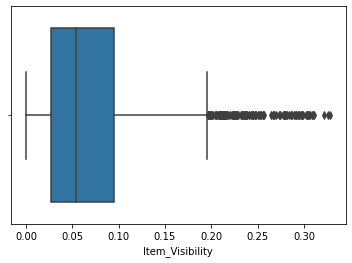

In [57]:
sns.boxplot(df_train['Item_Visibility'])

In [58]:
# Using IQR Method removing ouliers

# IQR Method for column "Item_Visibility"

q1 = df_train["Item_Visibility"].quantile(0.25)
q2 = df_train["Item_Visibility"].quantile(0.50)
q3 = df_train["Item_Visibility"].quantile(0.75)

IQR = q3-q1
print ("IQR  :: ",IQR)

uppertail =q3 + (1.5*IQR)
lowertail =q1 - (1.5*IQR)

print ("uppertail value >>" ,uppertail)
print ("lowertail value >>" ,lowertail)

IQR  ::  0.067595815
uppertail value >> 0.195979015
lowertail value >> -0.07440424500000001


In [59]:
df_train["Item_Visibility"].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [60]:
df_train.loc[(df_train["Item_Visibility"] > uppertail)] 

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
49,12.857645,1,0.255395,4,196.8794,1985,2,0,0,780.3176
83,12.857645,0,0.293418,9,194.6136,1985,2,0,0,583.2408
108,12.857645,0,0.278974,14,225.3720,1985,2,0,0,679.1160
174,17.700000,0,0.291865,6,115.1834,1998,2,2,0,345.5502
334,12.857645,0,0.204700,5,76.8670,1985,2,0,0,229.7010
...,...,...,...,...,...,...,...,...,...,...
8292,12.857645,1,0.209163,6,179.1976,1985,2,0,0,543.2928
8345,12.857645,1,0.266397,5,215.6218,1985,2,0,0,641.1654
8371,8.270000,1,0.214125,14,183.9924,1998,2,2,0,185.0924
8432,14.000000,1,0.227261,5,54.3640,1998,2,2,0,159.7920


In [61]:
df_train.loc[(df_train["Item_Visibility"] < lowertail)] 

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [62]:
# finding data without ouliers
df_train.loc[(df_train["Item_Visibility"]<=uppertail) & (df_train["Item_Visibility"]>=lowertail)]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,1,0.000000,6,182.0950,1998,2,2,0,732.3800
4,8.930,0,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,2002,2,1,1,549.2850
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [63]:
mean_data = df_train.loc[(df_train["Item_Visibility"]<=uppertail) & (df_train["Item_Visibility"]>=lowertail),"Item_Visibility"].mean()
mean_data = int(np.ceil(mean_data))
mean_data

1

In [64]:
# outliers handling
df_train.loc[(df_train["Item_Visibility"]>uppertail),"Item_Visibility"] = mean_data

In [65]:
df_train.loc[(df_train["Item_Visibility"] > uppertail)]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
49,12.857645,1,1.0,4,196.8794,1985,2,0,0,780.3176
83,12.857645,0,1.0,9,194.6136,1985,2,0,0,583.2408
108,12.857645,0,1.0,14,225.3720,1985,2,0,0,679.1160
174,17.700000,0,1.0,6,115.1834,1998,2,2,0,345.5502
334,12.857645,0,1.0,5,76.8670,1985,2,0,0,229.7010
...,...,...,...,...,...,...,...,...,...,...
8292,12.857645,1,1.0,6,179.1976,1985,2,0,0,543.2928
8345,12.857645,1,1.0,5,215.6218,1985,2,0,0,641.1654
8371,8.270000,1,1.0,14,183.9924,1998,2,2,0,185.0924
8432,14.000000,1,1.0,5,54.3640,1998,2,2,0,159.7920


<AxesSubplot:xlabel='Item_Visibility'>

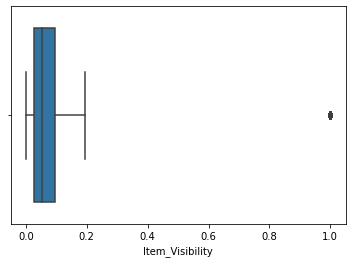

In [66]:
sns.boxplot(df_train['Item_Visibility'])

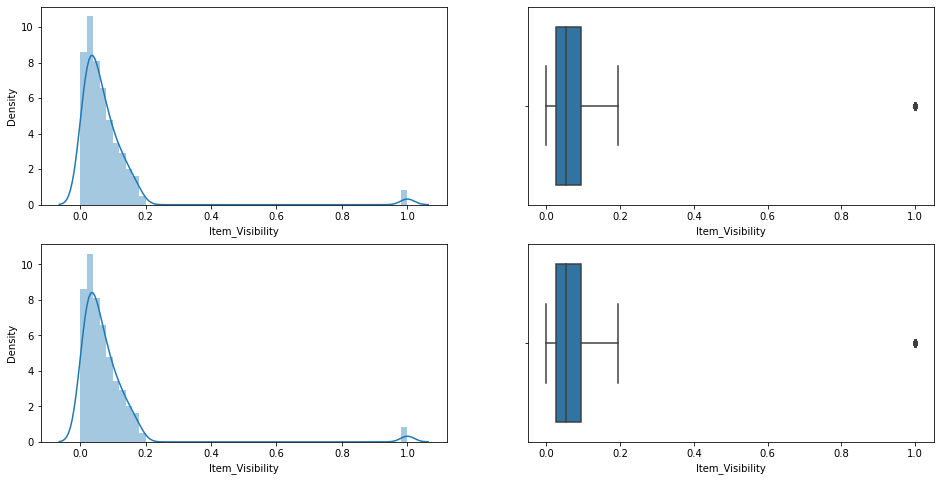

In [67]:
plt.figure(figsize = (16,8))

plt.subplot(2,2,1)
sns.distplot(df_train['Item_Visibility'])

plt.subplot(2,2,2)
sns.boxplot(df_train['Item_Visibility'])

plt.subplot(2,2,3)
sns.distplot(df_train['Item_Visibility'])

plt.subplot(2,2,4)
sns.boxplot(df_train['Item_Visibility'])

plt.show()

In [68]:
# Capping

In [69]:
q1 = df_train["Item_Visibility"].quantile(0.25)
q2 = df_train["Item_Visibility"].quantile(0.50)
q3 = df_train["Item_Visibility"].quantile(0.75)

IQR = q3-q1
print ("IQR  :: ",IQR)

uppertail =q3 + (1.5*IQR)
lowertail =q1 - (1.5*IQR)

IQR  ::  0.067595815


In [70]:
def capping(x):
    if x < lowertail:
        x = lowertail
        return x
    elif x > uppertail:
        x = uppertail
        return x
    else:
        return x

In [71]:
df_train.Item_Visibility = df_train.Item_Visibility.apply(capping)

<AxesSubplot:xlabel='Item_Visibility'>

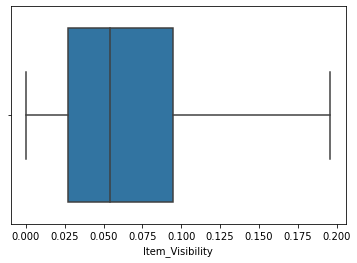

In [72]:
sns.boxplot(x = 'Item_Visibility', data = df_train)

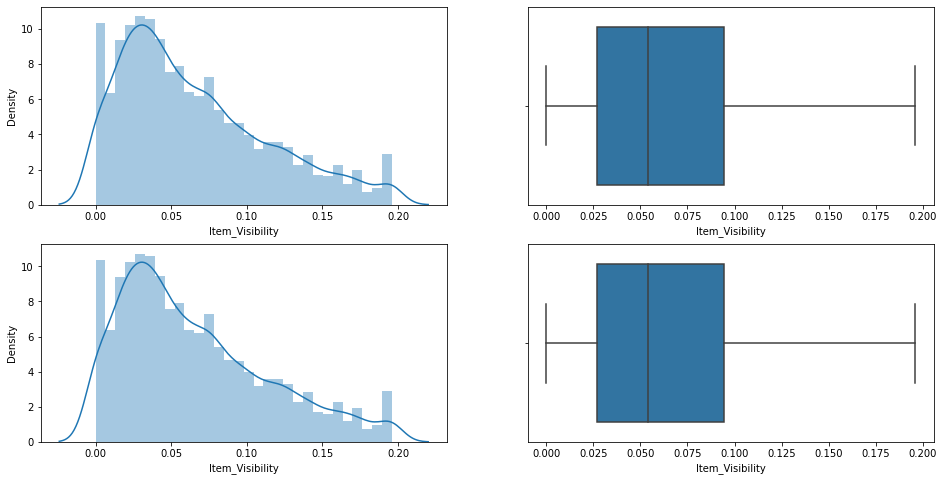

In [73]:
plt.figure(figsize = (16,8))

plt.subplot(2,2,1)
sns.distplot(df_train['Item_Visibility'])

plt.subplot(2,2,2)
sns.boxplot(df_train['Item_Visibility'])

plt.subplot(2,2,3)
sns.distplot(df_train['Item_Visibility'])

plt.subplot(2,2,4)
sns.boxplot(df_train['Item_Visibility'])

plt.show()

<AxesSubplot:xlabel='Item_Outlet_Sales'>

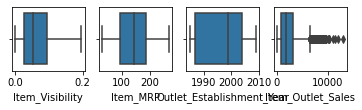

In [74]:
plt.figsize = (3,6)

plt.subplot(3,4,1)
sns.boxplot(df_train['Item_Visibility'])

plt.subplot(3,4,2)
sns.boxplot(df_train['Item_MRP'])

plt.subplot(3,4,3)
sns.boxplot(df_train['Outlet_Establishment_Year'])

plt.subplot(3,4,4)
sns.boxplot(df_train['Item_Outlet_Sales'])

In [75]:
# ------------------------------------------------------------------------------------------------------------------------

<AxesSubplot:xlabel='Item_Outlet_Sales'>

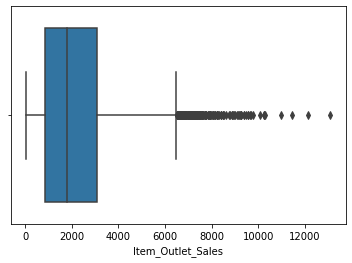

In [76]:
# Item_Outlet_Sales

sns.boxplot(df_train['Item_Outlet_Sales'])

In [77]:
# Using IQR Method removing ouliers

# IQR Method for column "Item_Outlet_Sales"

q1 = df_train["Item_Outlet_Sales"].quantile(0.25)
q2 = df_train["Item_Outlet_Sales"].quantile(0.50)
q3 = df_train["Item_Outlet_Sales"].quantile(0.75)

IQR = q3-q1
print ("IQR  :: ",IQR)

uppertail =q3 + (1.5*IQR)
lowertail =q1 - (1.5*IQR)

print ("uppertail value >>" ,uppertail)
print ("lowertail value >>" ,lowertail)

IQR  ::  2267.049
uppertail value >> 6501.8699
lowertail value >> -2566.3261


In [78]:
df_train["Item_Outlet_Sales"].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [79]:
df_train.loc[(df_train["Item_Outlet_Sales"] > uppertail)] 

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
43,21.350000,0,0.069103,3,259.9278,2009,1,2,2,6768.5228
130,12.857645,0,0.033810,3,180.5976,1985,1,2,3,7968.2944
132,12.857645,0,0.144338,8,224.4404,1985,1,2,3,6976.2524
145,18.600000,0,0.039356,5,246.3802,1999,1,0,1,7370.4060
203,12.857645,0,0.078362,0,177.9370,1985,1,2,3,6704.6060
...,...,...,...,...,...,...,...,...,...,...
8245,16.200000,0,0.035967,6,260.3278,1999,1,0,1,7549.5062
8329,12.857645,0,0.041622,9,253.6014,1985,1,2,3,6630.0364
8350,10.000000,0,0.021421,9,248.3750,2004,2,1,1,7240.5750
8447,20.350000,0,0.089975,4,261.6594,2007,2,1,1,7588.1226


In [80]:
df_train.loc[(df_train["Item_Outlet_Sales"] < lowertail)] 

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [81]:
# finding data without ouliers
df_train.loc[(df_train["Item_Outlet_Sales"]<=uppertail) & (df_train["Item_Outlet_Sales"]>=lowertail)]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,1,0.000000,6,182.0950,1998,2,2,0,732.3800
4,8.930,0,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,2002,2,1,1,549.2850
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [82]:
mean_data = df_train.loc[(df_train["Item_Outlet_Sales"]<=uppertail) & (df_train["Item_Outlet_Sales"]>=lowertail),"Item_Outlet_Sales"].mean()
mean_data = int(np.ceil(mean_data))
mean_data

2060

In [83]:
# outliers handling
df_train.loc[(df_train["Item_Outlet_Sales"]>uppertail),"Item_Outlet_Sales"] = mean_data

In [84]:
df_train.loc[(df_train["Item_Outlet_Sales"] > uppertail)]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


<AxesSubplot:xlabel='Item_Outlet_Sales'>

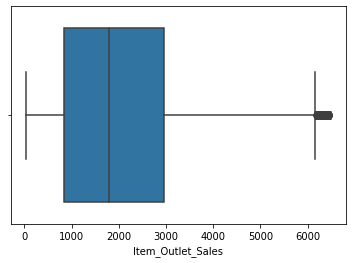

In [85]:
sns.boxplot(df_train['Item_Outlet_Sales'])

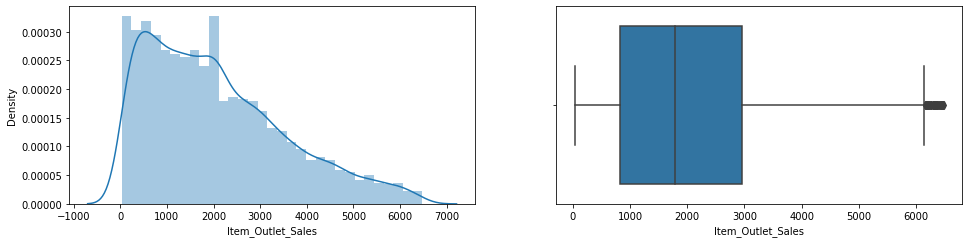

In [86]:
plt.figure(figsize = (16,8))

plt.subplot(2,2,1)
sns.distplot(df_train['Item_Outlet_Sales'])

plt.subplot(2,2,2)
sns.boxplot(df_train['Item_Outlet_Sales'])
plt.show()

In [87]:
# Capping

In [88]:
q1 = df_train["Item_Outlet_Sales"].quantile(0.25)
q2 = df_train["Item_Outlet_Sales"].quantile(0.50)
q3 = df_train["Item_Outlet_Sales"].quantile(0.75)

IQR = q3-q1
print ("IQR  :: ",IQR)

uppertail =q3 + (1.5*IQR)
lowertail =q1 - (1.5*IQR)

IQR  ::  2126.5652


In [89]:
def capping(x):
    if x < lowertail:
        x = lowertail
        return x
    elif x > uppertail:
        x = uppertail
        return x
    else:
        return x

In [90]:
df_train.Item_Outlet_Sales = df_train.Item_Outlet_Sales.apply(capping)

<AxesSubplot:xlabel='Item_Outlet_Sales'>

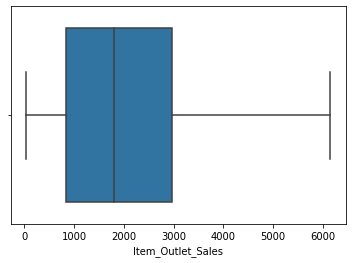

In [91]:
sns.boxplot(x = 'Item_Outlet_Sales', data = df_train)

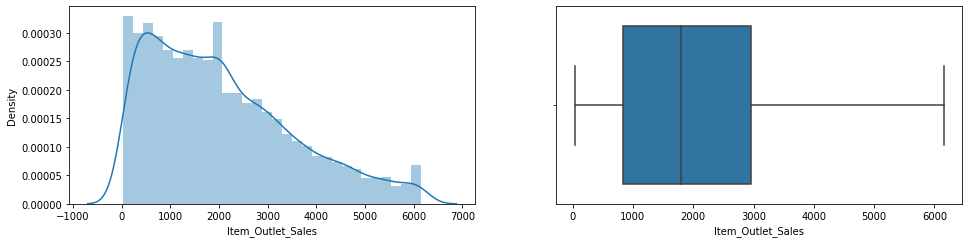

In [92]:
plt.figure(figsize = (16,8))

plt.subplot(2,2,1)
sns.distplot(df_train['Item_Outlet_Sales'])

plt.subplot(2,2,2)
sns.boxplot(df_train['Item_Outlet_Sales'])
plt.show()

### Spliting Data into train and test

In [93]:
X = df_train.drop("Item_Outlet_Sales", axis = 1)

In [94]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0,0.016047,4,249.8092,1999,1,0,1
1,5.92,1,0.019278,14,48.2692,2009,1,2,2
2,17.50,0,0.016760,10,141.6180,1999,1,0,1
3,19.20,1,0.000000,6,182.0950,1998,2,2,0
4,8.93,0,0.000000,9,53.8614,1987,0,2,1


In [95]:
Y = df_train["Item_Outlet_Sales"]

In [96]:
Y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=45)

In [98]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1984,10.195,1,0.017731,15,239.8538,2007,2,1,1
6881,8.890,0,0.005473,5,100.5016,2004,2,1,1
6071,6.115,1,0.011373,5,89.6488,1997,2,0,1
813,9.895,0,0.167799,14,239.4564,2004,2,1,1
6448,12.800,0,0.076370,6,97.2410,2009,1,2,2


In [99]:
X_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4454,12.800000,0,0.069902,15,261.3252,2009,1,2,2
4743,18.500000,0,0.025740,10,89.4172,1987,0,2,1
3017,12.857645,0,0.195979,8,223.8404,1985,2,0,0
5753,11.800000,1,0.057538,10,149.8366,2002,2,1,1
1478,12.857645,0,0.026055,6,169.5474,1985,1,2,3


### Standarization

In [100]:
X.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.065307,7.226681,140.992782,1997.831867,1.453596,1.112871,1.201220
std,4.226124,0.477836,0.048841,4.209990,62.275067,8.371760,0.683084,0.812757,0.796459
min,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000
25%,9.310000,0.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000
50%,12.857645,0.000000,0.053931,6.000000,143.012800,1999.000000,2.000000,1.000000,1.000000
75%,16.000000,1.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000
max,21.350000,1.000000,0.195979,15.000000,266.888400,2009.000000,2.000000,2.000000,3.000000


In [101]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [102]:
X_train_std = sc.fit_transform(X_train)
X_train_std

array([[-0.63154088,  1.36422119, -0.97609438, ...,  0.79003603,
        -0.14017001, -0.24484263],
       [-0.94010317, -0.73301896, -1.22650255, ...,  0.79003603,
        -0.14017001, -0.24484263],
       [-1.59624138,  1.36422119, -1.10598168, ...,  0.79003603,
        -1.37489755, -0.24484263],
       ...,
       [-1.24511877,  1.36422119,  2.6653396 , ...,  0.79003603,
         1.09455753, -1.50567121],
       [-1.10679774, -0.73301896, -0.38332337, ...,  0.79003603,
        -0.14017001, -0.24484263],
       [-1.05123288, -0.73301896,  2.5006743 , ...,  0.79003603,
         1.09455753, -1.50567121]])

In [103]:
X_test_std = sc.transform(X_test)
X_test_std

array([[-1.55985177e-02, -7.33018962e-01,  8.97181833e-02, ...,
        -6.68130095e-01,  1.09455753e+00,  1.01598595e+00],
       [ 1.33214484e+00, -7.33018962e-01, -8.12472033e-01, ...,
        -2.12629622e+00,  1.09455753e+00, -2.44842628e-01],
       [-1.96853282e-03, -7.33018962e-01,  2.66533960e+00, ...,
         7.90036034e-01, -1.37489755e+00, -1.50567121e+00],
       ...,
       [ 1.06023170e+00, -7.33018962e-01,  2.09508166e+00, ...,
        -6.68130095e-01,  1.09455753e+00,  1.01598595e+00],
       [-1.96509746e+00,  1.36422119e+00, -6.36436971e-01, ...,
         7.90036034e-01, -1.37489755e+00, -2.44842628e-01],
       [-1.24511877e+00,  1.36422119e+00,  1.57551595e+00, ...,
        -6.68130095e-01, -1.37489755e+00, -2.44842628e-01]])

### Model Building

>1. Linear Regression

In [104]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [105]:
# Training model of linear regression

y_pred_train = lr.predict(X_train)
mse = mean_squared_error(Y_train,y_pred_train)*100
print("MSE = ",mse)
r2 = r2_score(Y_train,y_pred_train)*100
print("r2 score = ",r2)
mae = mean_absolute_error(Y_train,y_pred_train)*100
print("MAE = ",mae)

MSE =  117987492.17439394
r2 score =  45.56401283241107
MAE =  84274.21422237315


In [106]:
# Training model of linear regression

y_pred_test = lr.predict(X_test)
mse = mean_squared_error(Y_test,y_pred_test)*100
print("MSE = ",mse)
test_lr_r2 = r2_score(Y_test,y_pred_test)*100
print("r2 score = ",test_lr_r2)
mae = mean_absolute_error(Y_test,y_pred_test)*100
print("MAE = ",mae)

MSE =  132599740.52908391
r2 score =  43.96283785792685
MAE =  88658.95757599434


In [107]:
lr_reg_pred= lr.predict(X_test)

In [108]:
from sklearn.metrics import r2_score
lr_reg_score=r2_score(Y_test,lr_reg_pred)*100
print("Accuracy score for LR :",lr_reg_score)

Accuracy score for LR : 43.96283785792685


>2. Random Forest Regressor Algorithm

In [109]:
rfr=RandomForestRegressor()
rfr

RandomForestRegressor()

In [110]:
rfr.fit(X_train,Y_train)

RandomForestRegressor()

In [111]:
# Training model of RandomForestRegressor
print(rfr.score(X_train,Y_train))

0.9290518810427711


In [112]:
rfr_pred=rfr.predict(X_test)

In [113]:
from sklearn.metrics import r2_score

rfr_score= r2_score(Y_test,rfr_pred)*100
print("Accuracy score for RFR :",rfr_score)

Accuracy score for RFR : 52.33572015386079


### Hyperparameter Tuning for RandomForestRegressor

In [114]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, Y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.508 using {'n_estimators': 1000}
0.466 (0.001) with: {'n_estimators': 10}
0.505 (0.002) with: {'n_estimators': 100}
0.508 (0.001) with: {'n_estimators': 1000}


In [115]:
grid_search_forest.best_params_

{'n_estimators': 1000}

In [116]:
grid_search_forest.best_score_

0.5081596306811678

In [117]:
Y_pred_rf_grid=grid_search_forest.predict(X_test_std)

In [118]:
r2_score(Y_test,Y_pred_rf_grid)

0.525626401928541

>3. XG Boost Regressor

In [119]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [120]:
xgbr = XGBRegressor()
print (xgbr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [121]:
xgbr.fit(X_train,Y_train)
score = xgbr.score(X_train,Y_train)
print ("Training Score =", score)

Training Score = 0.8278401507036484


In [122]:
test_score = xgbr.score(X_test,Y_test)*100
print ("Testing Score =", test_score)

Testing Score = 50.08834713192978


In [123]:
cv_score = cross_val_score(xgbr, X_train, Y_train, cv=10)
print ("CV mean score =",cv_score.mean())

CV mean score = 0.47699820766736306


In [124]:
y_pred= xgbr.predict(X_test)
mse = mean_squared_error(Y_test,y_pred)
print ("MSE =",mse)
print ("RMSE =",mse*(1/2.0))

MSE = 1181050.5683539542
RMSE = 590525.2841769771


>4. KNN Regressor

In [125]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_curve

In [126]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train,Y_train)

KNeighborsRegressor()

In [127]:
# Training

y_pred_Knn_train = knn_reg.predict(X_train)
mse = mean_squared_error(Y_train,y_pred_Knn_train)
print("MSE",mse)
print("*"*20)

mae = mean_absolute_error(Y_train,y_pred_Knn_train)
print("MAE",mae)
print("*"*20)
R2_SCORE = r2_score(Y_train,y_pred_Knn_train)
print("R2_score",R2_SCORE)

MSE 884303.0117346243
********************
MAE 701.3770716456438
********************
R2_score 0.5920083857033338


In [128]:
# Testing

y_pred_Knn_test = knn_reg.predict(X_test)
mse = mean_squared_error(Y_test,y_pred_Knn_test)
print("MSE",mse)
print("*"*20)

mae = mean_absolute_error(Y_test,y_pred_Knn_test)
print("MAE",mae)
print("*"*20)
R2_SCORE = r2_score(Y_test,y_pred_Knn_test)*100
print("R2_score",R2_SCORE)

MSE 1460699.5477860493
********************
MAE 887.3774432609972
********************
R2_score 38.27027332516811


>5. Decision Tree Regressor

In [133]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train,Y_train)

DecisionTreeRegressor()

In [134]:
# Training

y_pred_dtr_train = dt_reg.predict(X_train)

mse = mean_squared_error(Y_train,y_pred_dtr_train)
print("mse =",mse)

mae = mean_absolute_error(Y_train,y_pred_dtr_train)
print("mae =",mae)
r2_value =r2_score(Y_train,y_pred_dtr_train)
print("R- squared =",r2_value)

mse = 2.274807346050054e-29
mae = 1.000470851172919e-16
R- squared = 1.0


In [170]:
# Testing

y_pred_dtr_test = dt_reg.predict(X_test)

mse = mean_squared_error(Y_test,y_pred_dtr_test)
print("mse =",mse)

mae = mean_absolute_error(Y_test,y_pred_dtr_test)
print("mae =",mae)
DT_r2_value =r2_score(Y_test,y_pred_dtr_test)*100
print("R2- squared =",DT_r2_value)

mse = 2027460.802934415
mae = 1004.8682452785924
R2- squared = 14.318723930071208


>6. Gradient Boost

In [148]:
gb_parameters = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 
                         'n_estimators':[100,250,500,750,1000,1250,1500,1750],
                         'max_depth':[2,3,4,5,6,7],
                         'min_samples_split':[2,4,6,8,10,20,40,60,100],
                         'min_samples_leaf':[1,3,5,7,9],
                         'max_features':[2,3,4,5,6,7],
                         'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]
                        }

In [150]:
from sklearn.model_selection import RandomizedSearchCV
gb_reg = GradientBoostingRegressor()
random_gb = RandomizedSearchCV(estimator=gb_reg,
                                        param_distributions=gb_parameters,
                                        cv=5,
                                        scoring='neg_root_mean_squared_error',
                                        n_iter=10,
                                        n_jobs=-1,
                                        verbose=2,
                                        random_state=101
                                        )

In [152]:
random_gb.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.15, 0.1, 0.05, 0.01,
                                                          0.005, 0.001],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'max_features': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 3, 5, 7, 9],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              20, 40, 60, 100],
                                        'n_estimators': [100, 250, 500, 750,
                                                         1000, 1250, 1500,
                                                         1750],
                                        'subsample': [0.7, 0.75, 0.8, 0.85, 0.9,
                                                      0.95, 1]},
                   random_state=101, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [153]:
 best_param = random_gb.best_params_

In [154]:
gb_model = GradientBoostingRegressor(subsample = best_param['subsample'],
                                                n_estimators = best_param['n_estimators'],
                                                min_samples_split = best_param['min_samples_split'],
                                                min_samples_leaf = best_param['min_samples_leaf'],
                                                max_features = best_param['max_features'],
                                                max_depth = best_param['max_depth'],
                                                learning_rate = best_param['learning_rate'])

In [155]:
gb_model.fit(X_train,Y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, max_features=3,
                          min_samples_split=40, subsample=0.85)

In [156]:
gb_model.score(X_train,Y_train)

0.5840447883979272

In [157]:
gb_model.score(X_test,Y_test)

0.5601369589692773

In [158]:
y_test_pred = gb_model.predict(X_test)

In [159]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(Y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(Y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(Y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(Y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(Y_test, y_test_pred), 2))

Mean absolute error = 742.11
Mean squared error = 1040840.09
Median absolute error = 499.66
Explain variance score = 0.56
R2 score = 0.56


### ------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [161]:
sample=pd.DataFrame({"Actual ":Y_test,
             "Predicted ":rfr.predict(X_test)})
sample.head(3)

,Actual,Predicted
4454,3410.2276,3665.264066
4743,1605.9096,1431.543238
3017,675.1212,712.605740


### Checking Accuracy score

In [172]:
pd.DataFrame({"Model Names":['Linear Reg','XG Boost','KNN Reg','Decision Tree Reg','RandomForest Reg',"Gradient Boost"],"Accuracy score":[test_lr_r2, XG_test_score,  r2_score(Y_test,y_pred_Knn_test) , DT_r2_value, r2_score(Y_test,rfr_pred) ,gb_model.score(X_test,Y_test)]})

,Model Names,Accuracy score
0,Linear Reg,43.962838
1,XG Boost,50.088347
2,KNN Reg,0.382703
3,Decision Tree Reg,14.318724
4,RandomForest Reg,0.523357
5,Gradient Boost,0.560137


### Saving The Final Model in Pkl File

In [175]:
import pickle 
# Saving model to disk
pickle.dump(rfr_pred, open('BigMart_Prediction.pkl','wb'))
model=pickle.load(open('BigMart_Prediction.pkl','rb'))